### __Data Preprocessing__

In [201]:
# import libraries
import numpy as np
import pandas as pd
import random
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image

from statsmodels.graphics.gofplots import qqplot

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import category encoders
import category_encoders as ce

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### __Preprocessing Steps__
> - #### Import all the datasets in csv

### Step 1. Import all datasets

In [32]:
# Import training csv file
train_df = pd.read_csv('combined_reduced_flights.csv')
train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 43 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fl_date              1562048 non-null  object 
 1   mkt_unique_carrier   1562048 non-null  object 
 2   branded_code_share   1562048 non-null  object 
 3   mkt_carrier          1562048 non-null  object 
 4   mkt_carrier_fl_num   1562048 non-null  int64  
 5   op_unique_carrier    1562048 non-null  object 
 6   tail_num             1562048 non-null  object 
 7   op_carrier_fl_num    1562048 non-null  int64  
 8   origin_airport_id    1562048 non-null  int64  
 9   origin               1562048 non-null  object 
 10  origin_city_name     1562048 non-null  object 
 11  dest_airport_id      1562048 non-null  int64  
 12  dest                 1562048 non-null  object 
 13  dest_city_name       1562048 non-null  object 
 14  crs_dep_time         1562048 non-null  int64  
 15

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,1.0,0.0,0.0,0.0,98.0,NaN,NaN,NaN,NaN,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
# Import testing csv file
test_df = pd.read_csv('flights_test.csv')
test_df.info()
test_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660556 entries, 0 to 660555
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fl_date             660556 non-null  object
 1   mkt_unique_carrier  660556 non-null  object
 2   branded_code_share  660556 non-null  object
 3   mkt_carrier         660556 non-null  object
 4   mkt_carrier_fl_num  660556 non-null  int64 
 5   op_unique_carrier   660556 non-null  object
 6   tail_num            659057 non-null  object
 7   op_carrier_fl_num   660556 non-null  int64 
 8   origin_airport_id   660556 non-null  int64 
 9   origin              660556 non-null  object
 10  origin_city_name    660556 non-null  object
 11  dest_airport_id     660556 non-null  int64 
 12  dest                660556 non-null  object
 13  dest_city_name      660556 non-null  object
 14  crs_dep_time        660556 non-null  int64 
 15  crs_arr_time        660556 non-null  int64 
 16  du

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333


In [4]:
# Import passengers csv file
passengers = pd.read_csv('passengers.csv')
passengers.info()
passengers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350497 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,2.0,4000.0,16.0,0.0,0.0,0.0,223.0,126.0,91.0,...,US,United States,6,651,1,2015,6,1,L,DU
1,0.0,1.0,2000.0,8.0,1.0,0.0,0.0,236.0,100.0,45.0,...,US,United States,6,651,1,2015,6,1,L,DU
2,0.0,1.0,3000.0,13.0,0.0,0.0,0.0,386.0,80.0,63.0,...,US,United States,6,641,1,2015,6,1,L,DU


In [5]:
# Import fuel_consumption csv file
fuel = pd.read_csv('fuel_consumption.csv')
fuel.info()
fuel.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3035 non-null   int64  
 1   airline_id         3034 non-null   float64
 2   unique_carrier     3034 non-null   object 
 3   carrier            3035 non-null   object 
 4   carrier_name       3034 non-null   object 
 5   carrier_group_new  3035 non-null   int64  
 6   sdomt_gallons      3034 non-null   float64
 7   satl_gallons       3034 non-null   float64
 8   spac_gallons       3034 non-null   float64
 9   slat_gallons       3033 non-null   float64
 10  sint_gallons       3034 non-null   float64
 11  ts_gallons         3034 non-null   float64
 12  tdomt_gallons      3032 non-null   float64
 13  tint_gallons       3034 non-null   float64
 14  total_gallons      3029 non-null   float64
 15  sdomt_cost         3035 non-null   float64
 16  satl_cost          3034 

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


### Step 2. Preprocessing (Preliminary): Training Dataset
> - remove variables from train_df, which are not in testing dataset
> - identify the target variables (i.e. arr_delay & target_class) and separate from other variables for preprocessing
> - Rearrange the order of columns  - training variables vs target variables
> - Create the summary of variables nad their data types
> - Pull the separate dataframes for categortical variables with string data types and numerical variables. Explore each category.
> - Convert string datetime to pandas datetime - 'fl_date' variable
> - Check the distribution of target variable (i.e. arr_delay). Is it normally distributed or not?
> - Export thhis preliminary, preprocessed training dataset to csv.

In [33]:
# start time to measure the time of the program execution
start_time = time.time()

# remove columns that are not in testing datasets

# get list of columns in test_df
test_colnames = test_df.columns.tolist()
test_colnames

# get list of columns in test_df
train_colnames = train_df.columns.tolist()
train_colnames

# identify the target columns in train_df
target_columns = ['arr_delay', 'target_class']

# get the list of columns to be removed from train_df
remove_columns = list(set(train_colnames) - set(test_colnames) - set(target_columns))
remove_columns

# remove the columns identified above from train_df
train_df = train_df.drop(columns = remove_columns)
train_df.info()
train_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'crs_arr_time',
 'dup',
 'crs_elapsed_time',
 'flights',
 'distance']

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name',
 'target_class']

['no_name',
 'arr_time',
 'security_delay',
 'first_dep_time',
 'wheels_off',
 'taxi_in',
 'weather_delay',
 'dep_time',
 'air_time',
 'longest_add_gtime',
 'total_add_gtime',
 'carrier_delay',
 'taxi_out',
 'cancellation_code',
 'dep_delay',
 'cancelled',
 'nas_delay',
 'late_aircraft_delay',
 'wheels_on',
 'actual_elapsed_time',
 'diverted']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fl_date             1562048 non-null  object 
 1   mkt_unique_carrier  1562048 non-null  object 
 2   branded_code_share  1562048 non-null  object 
 3   mkt_carrier         1562048 non-null  object 
 4   mkt_carrier_fl_num  1562048 non-null  int64  
 5   op_unique_carrier   1562048 non-null  object 
 6   tail_num            1562048 non-null  object 
 7   op_carrier_fl_num   1562048 non-null  int64  
 8   origin_airport_id   1562048 non-null  int64  
 9   origin              1562048 non-null  object 
 10  origin_city_name    1562048 non-null  object 
 11  dest_airport_id     1562048 non-null  int64  
 12  dest                1562048 non-null  object 
 13  dest_city_name      1562048 non-null  object 
 14  crs_dep_time        1562048 non-null  int64  
 15  crs_arr_time   

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,dup,crs_elapsed_time,flights,distance,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,99.0,N,169.0,1.0,1158.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,2.0,N,146.0,1.0,875.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,1.0,N,177.0,1.0,875.0,1
3,2019-05-01,AA,AA_CODESHARE,AA,4648,YX,N110HQ,4648,11624,EYW,...,CLT,"Charlotte, NC",1441,1705,4.0,N,144.0,1.0,736.0,1
4,2019-05-01,AA,AA_CODESHARE,AA,4656,YX,N114HQ,4656,10868,CAE,...,CLT,"Charlotte, NC",1253,1401,15.0,N,68.0,1.0,88.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562043,2018-11-30,UA,UA_CODESHARE,UA,6140,YV,N85320,6140,12266,IAH,...,LIT,"Little Rock, AR",1433,1558,-12.0,N,85.0,1.0,374.0,0
1562044,2018-11-30,UA,UA_CODESHARE,UA,6005,YV,N87345,6005,12264,IAD,...,GSP,"Greer, SC",1720,1853,-14.0,N,93.0,1.0,384.0,0
1562045,2018-11-30,UA,UA_CODESHARE,UA,6131,YV,N503MJ,6131,12264,IAD,...,CHS,"Charleston, SC",2200,2343,-21.0,N,103.0,1.0,441.0,0
1562046,2018-11-30,UA,UA_CODESHARE,UA,6045,YV,N511MJ,6045,13931,ORF,...,IAD,"Washington, DC",1030,1127,-4.0,N,57.0,1.0,157.0,0




--- 5.9334330558776855 seconds ---


In [34]:
# start time to measure the time of the program execution
start_time = time.time()

# check all the columns in testing dataset are in the training dataset
train_colnames2 = train_df.columns.tolist()
check_columns = set(train_colnames2) - set(test_colnames)
check_columns

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

{'arr_delay', 'target_class'}



--- 0.003446340560913086 seconds ---


In [35]:
# start time to measure the time of the program execution
start_time = time.time()

# check for any missing values
train_df.isnull().sum()

#  reorder columns in train_df
rearranged_columns = ['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
                   'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
                   'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
                   'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup', 
                   'crs_elapsed_time', 'flights', 'distance', 'arr_delay','target_class']

train_df = train_df[rearranged_columns]
train_df.info()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

fl_date               0
mkt_unique_carrier    0
branded_code_share    0
mkt_carrier           0
mkt_carrier_fl_num    0
op_unique_carrier     0
tail_num              0
op_carrier_fl_num     0
origin_airport_id     0
origin                0
origin_city_name      0
dest_airport_id       0
dest                  0
dest_city_name        0
crs_dep_time          0
crs_arr_time          0
arr_delay             0
dup                   0
crs_elapsed_time      0
flights               0
distance              0
target_class          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fl_date             1562048 non-null  object 
 1   mkt_unique_carrier  1562048 non-null  object 
 2   branded_code_share  1562048 non-null  object 
 3   mkt_carrier         1562048 non-null  object 
 4   mkt_carrier_fl_num  1562048 non-null  int64  
 5   op_unique_carrier   1562048 non-null  object 
 6   tail_num            1562048 non-null  object 
 7   op_carrier_fl_num   1562048 non-null  int64  
 8   origin_airport_id   1562048 non-null  int64  
 9   origin              1562048 non-null  object 
 10  origin_city_name    1562048 non-null  object 
 11  dest_airport_id     1562048 non-null  int64  
 12  dest                1562048 non-null  object 
 13  dest_city_name      1562048 non-null  object 
 14  crs_dep_time        1562048 non-null  int64  
 15  crs_arr_time   

In [36]:
# start time to measure the time of the program execution
start_time = time.time()

# separate columns with object types from columns with numerical types

# separate target columnms
train_target = train_df[['arr_delay', 'target_class']]

# create summary table that shows datatype for each feature in train_df
colname = train_df.iloc[:, :20].columns.tolist()
dtypes = train_df.iloc[:, :20].dtypes
train_datatype = pd.DataFrame({'columns': colname, 'Dtype': dtypes})
train_datatype.reset_index(inplace = True, drop = True)
train_datatype

# get the list of columns for features in object data type and in numerical data type
object_columns = train_datatype[train_datatype['Dtype'] == 'object']['columns']
numerical_columns = train_datatype[train_datatype['Dtype'] != 'object']['columns']

object_columns
numerical_columns

# divide train_df into two dataframes - object data type columns and numerical data type columns
train_object = train_df[object_columns]
train_numerical = train_df[numerical_columns]

train_object.info()
train_numerical.info()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,columns,Dtype
0,fl_date,object
1,mkt_unique_carrier,object
2,branded_code_share,object
3,mkt_carrier,object
4,mkt_carrier_fl_num,int64
5,op_unique_carrier,object
6,tail_num,object
7,op_carrier_fl_num,int64
8,origin_airport_id,int64
9,origin,object


0                fl_date
1     mkt_unique_carrier
2     branded_code_share
3            mkt_carrier
5      op_unique_carrier
6               tail_num
9                 origin
10      origin_city_name
12                  dest
13        dest_city_name
16                   dup
Name: columns, dtype: object

4     mkt_carrier_fl_num
7      op_carrier_fl_num
8      origin_airport_id
11       dest_airport_id
14          crs_dep_time
15          crs_arr_time
17      crs_elapsed_time
18               flights
19              distance
Name: columns, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   fl_date             1562048 non-null  object
 1   mkt_unique_carrier  1562048 non-null  object
 2   branded_code_share  1562048 non-null  object
 3   mkt_carrier         1562048 non-null  object
 4   op_unique_carrier   1562048 non-null  object
 5   tail_num            1562048 non-null  object
 6   origin              1562048 non-null  object
 7   origin_city_name    1562048 non-null  object
 8   dest                1562048 non-null  object
 9   dest_city_name      1562048 non-null  object
 10  dup                 1562048 non-null  object
dtypes: object(11)
memory usage: 131.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              ------

In [37]:
# start time to measure the time of the program execution
start_time = time.time()

# train_object:
# 'fl_date' should be converted to datetime ('2019-05-01')
train_df['fl_date'] = pd.to_datetime(train_df['fl_date'], format='%Y-%m-%d')

# get the summary of unique values of each feature
for i in object_columns[1:]:
    print(f"\n{i}: {train_object[i].nunique()} | {train_object[i].unique()}")

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")


mkt_unique_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'NK' 'WN' 'HA' 'AS' 'F9' 'B6' 'VX']

branded_code_share: 16 | ['AA_CODESHARE' 'DL' 'UA_CODESHARE' 'AA' 'G4' 'NK' 'DL_CODESHARE' 'WN'
 'HA' 'AS' 'UA' 'HA_CODESHARE' 'AS_CODESHARE' 'F9' 'B6' 'VX']

mkt_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'NK' 'WN' 'HA' 'AS' 'F9' 'B6' 'VX']

op_unique_carrier: 28 | ['YX' 'DL' 'YV' 'AA' 'G4' 'NK' '9E' 'MQ' 'WN' 'PT' 'OH' 'HA' 'AS' 'UA'
 'EM' 'OO' 'C5' 'ZW' 'AX' 'G7' 'F9' 'QX' 'B6' 'CP' 'EV' 'KS' 'VX' '9K']

tail_num: 6460 | ['N436YX' 'N102HQ' 'N110HQ' ... 'N153DL' 'N801NW' 'N363PH']

origin: 375 | ['OKC' 'MEM' 'PHL' 'EYW' 'CAE' 'IND' 'DFW' 'LAX' 'CLT' 'DTW' 'ORD' 'JFK'
 'BNA' 'GSO' 'ORF' 'ATL' 'SEA' 'TPA' 'MDW' 'ELP' 'AUS' 'SLC' 'FSD' 'BOS'
 'MSP' 'TVC' 'LGA' 'MKE' 'GRB' 'RDU' 'LAS' 'SNA' 'IAH' 'COS' 'MIA' 'MAF'
 'SGF' 'AZA' 'EWR' 'DAY' 'MSY' 'DAB' 'DEN' 'SDF' 'SAV' 'DCA' 'MCO' 'TLH'
 'OAK' 'GSP' 'ICT' 'STL' 'PDX' 'CMH' 'LBB' 'TUL' 'CLL' 'ABE' 'FAR' 'ABI'
 'SUX' 'MCI' 'SRQ' 'PHX' 'PIT' 'PVD' 'RNO' 'SAT' 'MDT' '

In [11]:
# train_numerical:
train_numerical.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance
count,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1562048.0,1.562048e+06
mean,2.721355e+03,2.721298e+03,1.268052e+04,1.268778e+04,1.345302e+03,1.499342e+03,1.385317e+02,1.0,7.737580e+02
std,1.859142e+03,1.859181e+03,1.521618e+03,1.523261e+03,4.882776e+02,5.183357e+02,7.180470e+01,0.0,5.873406e+02
min,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-1.120000e+02,1.0,1.600000e+01
25%,1.117000e+03,1.117000e+03,1.129200e+04,1.129200e+04,9.300000e+02,1.110000e+03,8.700000e+01,1.0,3.440000e+02
50%,2.302000e+03,2.302000e+03,1.288900e+04,1.288900e+04,1.339000e+03,1.529000e+03,1.200000e+02,1.0,6.070000e+02
75%,4.296000e+03,4.295000e+03,1.405700e+04,1.405700e+04,1.745000e+03,1.925000e+03,1.680000e+02,1.0,1.009000e+03
max,9.400000e+03,9.400000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,1.538000e+03,1.0,5.095000e+03


Max arr_delay (in minutes): 2695.0 | Median arr_delay: 0.0 | Min arr_delay: -241.0


(array([3.05265419e-08, 6.08915548e-03, 6.30983621e-04, 6.70842563e-05,
        1.21452027e-05, 4.18213624e-06, 2.94799176e-06, 2.42031868e-06,
        1.60482392e-06, 7.93690089e-07, 3.48874764e-07, 1.91881120e-07,
        6.54140183e-08, 8.72186911e-09, 8.72186911e-09, 1.30828037e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36093456e-09]),
 array([-241. ,  -94.2,   52.6,  199.4,  346.2,  493. ,  639.8,  786.6,
         933.4, 1080.2, 1227. , 1373.8, 1520.6, 1667.4, 1814.2, 1961. ,
        2107.8, 2254.6, 2401.4, 2548.2, 2695. ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Data - [arr_delay]')

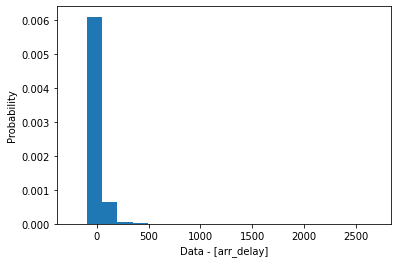

In [12]:
# target variables:
print(f"Max arr_delay (in minutes): {max(train_df['arr_delay'])} | \
Median arr_delay: {np.median(train_df['arr_delay'].values)} | Min arr_delay: {min(train_df['arr_delay'])}")

# plot histogram of arr_delay (in minutes)
np.random.seed(42)
x = train_df['arr_delay'].values

plt.hist(x, density=True, bins=20)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data - [arr_delay]')

In [13]:
train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   mkt_unique_carrier  1562048 non-null  object        
 2   branded_code_share  1562048 non-null  object        
 3   mkt_carrier         1562048 non-null  object        
 4   mkt_carrier_fl_num  1562048 non-null  int64         
 5   op_unique_carrier   1562048 non-null  object        
 6   tail_num            1562048 non-null  object        
 7   op_carrier_fl_num   1562048 non-null  int64         
 8   origin_airport_id   1562048 non-null  int64         
 9   origin              1562048 non-null  object        
 10  origin_city_name    1562048 non-null  object        
 11  dest_airport_id     1562048 non-null  int64         
 12  dest                1562048 non-null  object        
 13  dest_city_na

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,N,177.0,1.0,875.0,1.0,1


In [15]:
# export train_df to csv
train_df.to_csv('train_df.csv', index=False)

### Step 3. Preprocessing (2nd): Training Dataset
> - create additional columns from 'fl_date' variable - year, month and weekdays
    - https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html
    - https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek
    - https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
    - https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
> - For variables with city and state names, create additional variables to show city and state separately (both, dest and origin)
    - https://www.geeksforgeeks.org/python-string-split/
    - https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string
> - For 'crs_dep_time' and 'crs_arr_time', convert the integer values to time values.
    - https://thispointer.com/python-how-to-convert-a-timestamp-string-to-a-datetime-object-using-datetime-strptime/
    - https://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64
    - https://stackoverflow.com/questions/37801321/python-pandas-convert-string-to-time-only
> - Export train_df to csv file

> - reduce data size from 1.5M rows to 700K rows (50% reduction)
    - subdivide the dataset to four parts (2019 delay and no_delay, and 2018 delay and no_delay)
    - reduce each subdivided dataset, based on the reduction ratio and process taken from the previous reduction process
    - combine each reduced subdataset to one training dataset
    - confirm if the reduced dataset is still balanced
> - For string, categorical variables, apply the One Hot Encoding.
> - Export the preprocessed training dataset to csv.

In [38]:
# pull training data preprocessed from step 2.
train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   mkt_unique_carrier  1562048 non-null  object        
 2   branded_code_share  1562048 non-null  object        
 3   mkt_carrier         1562048 non-null  object        
 4   mkt_carrier_fl_num  1562048 non-null  int64         
 5   op_unique_carrier   1562048 non-null  object        
 6   tail_num            1562048 non-null  object        
 7   op_carrier_fl_num   1562048 non-null  int64         
 8   origin_airport_id   1562048 non-null  int64         
 9   origin              1562048 non-null  object        
 10  origin_city_name    1562048 non-null  object        
 11  dest_airport_id     1562048 non-null  int64         
 12  dest                1562048 non-null  object        
 13  dest_city_na

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,N,177.0,1.0,875.0,1.0,1


In [99]:
# start time to measure the time of the program execution
start_time = time.time()

# compute year, month and weekdays from 'fl_date' in train_df
month_train = [x.month for x in train_df['fl_date']]
year_train = [x.year for x in train_df['fl_date']]
dayofweek_train = train_df['fl_date'].dt.dayofweek
dayname_train = train_df['fl_date'].dt.day_name()

month_train[:10]
year_train[:10]
dayofweek_train[:10]
dayname_train[:10]

# insert month and year columns in train_df
train_df.insert(loc=1, column='year', value=year_train)
train_df.insert(loc=2, column='month', value=month_train)
train_df.insert(loc=3, column='day_of_week', value=dayofweek_train)
train_df.insert(loc=4, column='day_name', value=dayname_train)

train_df.info()
train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

[2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: fl_date, dtype: int64

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
5    Wednesday
6    Wednesday
7    Wednesday
8    Wednesday
9    Wednesday
Name: fl_date, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   year                1562048 non-null  int64         
 2   month               1562048 non-null  int64         
 3   day_of_week         1562048 non-null  int64         
 4   day_name            1562048 non-null  object        
 5   mkt_unique_carrier  1562048 non-null  object        
 6   branded_code_share  1562048 non-null  object        
 7   mkt_carrier         1562048 non-null  object        
 8   mkt_carrier_fl_num  1562048 non-null  int64         
 9   op_unique_carrier   1562048 non-null  object        
 10  tail_num            1562048 non-null  object        
 11  op_carrier_fl_num   1562048 non-null  int64         
 12  origin_airport_id   1562048 non-null  int64         
 13  origin      

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,DCA,"Washington, DC",655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,PHL,"Philadelphia, PA",1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,MEM,"Memphis, TN",840,1037,N,177.0,1.0,875.0,1.0,1




--- 29.846229314804077 seconds ---


In [100]:
# start time to measure the time of the program execution
start_time = time.time()

# create additional variables to show city and state separately (both, dest and origin)

# check variable values before creating separate columns
train_df['origin_city_name'][:10]
train_df['dest_city_name'][:10]

# function that splits city and name from variable and returns lists of city and state names
def split_cityname(var_array):
    city_name = []
    state_name = []
    
    for text in var_array:
        city, state = text.split(',')
        city_name.append(city)
        state_name.append(state.strip())

    return city_name, state_name

# run the function above to two variables
origin_city, origin_state = split_cityname(train_df['origin_city_name'])
dest_city, dest_state = split_cityname(train_df['dest_city_name'])

# insert city and state columns in train_df
# for 'origin_city_name' variable
train_df.insert(loc=15, column='origin_city', value=origin_city)
train_df.insert(loc=16, column='origin_state', value=origin_state)

# for 'dest_city_name' variable
train_df.insert(loc=20, column='dest_city', value=dest_city)
train_df.insert(loc=21, column='dest_state', value=dest_state)

# check
train_df.info()
train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

0        Oklahoma City, OK
1              Memphis, TN
2         Philadelphia, PA
3             Key West, FL
4             Columbia, SC
5         Indianapolis, IN
6    Dallas/Fort Worth, TX
7          Los Angeles, CA
8            Charlotte, NC
9              Detroit, MI
Name: origin_city_name, dtype: object

0      Washington, DC
1    Philadelphia, PA
2         Memphis, TN
3       Charlotte, NC
4       Charlotte, NC
5    Philadelphia, PA
6         Atlanta, GA
7        Portland, OR
8     Minneapolis, MN
9        San Jose, CA
Name: dest_city_name, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   year                1562048 non-null  int64         
 2   month               1562048 non-null  int64         
 3   day_of_week         1562048 non-null  int64         
 4   day_name            1562048 non-null  object        
 5   mkt_unique_carrier  1562048 non-null  object        
 6   branded_code_share  1562048 non-null  object        
 7   mkt_carrier         1562048 non-null  object        
 8   mkt_carrier_fl_num  1562048 non-null  int64         
 9   op_unique_carrier   1562048 non-null  object        
 10  tail_num            1562048 non-null  object        
 11  op_carrier_fl_num   1562048 non-null  int64         
 12  origin_airport_id   1562048 non-null  int64         
 13  origin      

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Philadelphia,PA,1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Memphis,TN,840,1037,N,177.0,1.0,875.0,1.0,1




--- 13.143491744995117 seconds ---


In [115]:
# start time to measure the time of the program execution
start_time = time.time()

# For 'crs_dep_time' and 'crs_arr_time', convert the integer values to time values.

# function that takes variable and returns list of time values
def convert_time(var_array):
    
    time_values = []
    
    # for each integer value in variable, 
    #   convert the value to string value in specific form
    #   that is acceptable for datetime strptime
    for value in var_array:
        hour = int(value / 100)
        minute = int(value % 100)
        
        if hour == 12:
            time_dist = 'PM'
        elif hour > 12:
            time_dist = 'PM'
            hour = hour - 12
        elif hour == 0:
            time_dist = 'AM'
            hour = 12
        else:
            time_dist = 'AM'

        time_string = str(hour) + ':' + str(minute) + ':00 ' + time_dist

        datetimeObj = datetime.strptime(time_string, '%I:%M:%S %p')
        # Get the time object from datetime object
        timeObj = datetimeObj.time()
        time_values.append(timeObj)
    
    return time_values

# run the function above to two variables
time_values_dep = convert_time(train_df['crs_dep_time'])
time_values_arr = convert_time(train_df['crs_arr_time'])

# convert variable values to converted values from above
train_df['crs_dep_time'] = time_values_dep
train_df['crs_arr_time'] = time_values_arr

# check
train_df.info()
train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   year                1562048 non-null  int64         
 2   month               1562048 non-null  int64         
 3   day_of_week         1562048 non-null  int64         
 4   day_name            1562048 non-null  object        
 5   mkt_unique_carrier  1562048 non-null  object        
 6   branded_code_share  1562048 non-null  object        
 7   mkt_carrier         1562048 non-null  object        
 8   mkt_carrier_fl_num  1562048 non-null  int64         
 9   op_unique_carrier   1562048 non-null  object        
 10  tail_num            1562048 non-null  object        
 11  op_carrier_fl_num   1562048 non-null  int64         
 12  origin_airport_id   1562048 non-null  int64         
 13  origin      

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,06:55:00,10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Philadelphia,PA,11:08:00,14:34:00,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Memphis,TN,08:40:00,10:37:00,N,177.0,1.0,875.0,1.0,1




--- 109.08580827713013 seconds ---


In [147]:
# start time to measure the time of the program execution
start_time = time.time()

# convert datetime.time object to pd.datetime
train_df['crs_dep_time'] = pd.to_datetime(train_df['crs_dep_time'],format= '%H:%M:%S')
train_df['crs_arr_time'] = pd.to_datetime(train_df['crs_arr_time'],format= '%H:%M:%S')

# check
train_df.info()
train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   year                1562048 non-null  int64         
 2   month               1562048 non-null  int64         
 3   day_of_week         1562048 non-null  int64         
 4   day_name            1562048 non-null  object        
 5   mkt_unique_carrier  1562048 non-null  object        
 6   branded_code_share  1562048 non-null  object        
 7   mkt_carrier         1562048 non-null  object        
 8   mkt_carrier_fl_num  1562048 non-null  int64         
 9   op_unique_carrier   1562048 non-null  object        
 10  tail_num            1562048 non-null  object        
 11  op_carrier_fl_num   1562048 non-null  int64         
 12  origin_airport_id   1562048 non-null  int64         
 13  origin      

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Philadelphia,PA,1900-01-01 11:08:00,1900-01-01 14:34:00,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4646,YX,...,Memphis,TN,1900-01-01 08:40:00,1900-01-01 10:37:00,N,177.0,1.0,875.0,1.0,1




--- 26.958930015563965 seconds ---


In [148]:
# export updated train_df to csv
train_df.to_csv('updated_train_df.csv', index=False)

In [154]:
# start time to measure the time of the program execution
start_time = time.time()

# Create the second set of training dataset to be preprocessed by making a copy of train_df
work_df = train_df.copy()

# subdivide copied train_df to 4 parts, reduce & combine
wk_2019delay = work_df[(work_df['year'] == 2019) & (work_df['target_class'] == 1)]
wk_2019nodelay = work_df[(work_df['year'] == 2019) & (work_df['target_class'] == 0)]
wk_2018delay = work_df[(work_df['year'] == 2018) & (work_df['target_class'] == 1)]
wk_2018nodelay = work_df[(work_df['year'] == 2018) & (work_df['target_class'] == 0)]

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 5.632598400115967 seconds ---


In [157]:
# export subdivided dataframes to csv files
wk_2019delay.to_csv('wk_2019delay.csv', index=False)
wk_2019nodelay.to_csv('wk_2019nodelay.csv', index=False)
wk_2018delay.to_csv('wk_2018delay.csv', index=False)
wk_2018nodelay.to_csv('wk_2018nodelay.csv', index=False)

In [188]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train1 = 'wk_2019delay.csv'

# Reduce the original train & test datasets
#  - original train dataset = 91 MB -> reducing to 30 MB
n_train = sum(1 for line in open(filename_train1))-1  # Calculate number of rows in file
s_train = n_train//3  # sample size of 33%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_delay = pd.read_csv(filename_train1, skiprows=skip_train)

reduced_wk2019_delay.info()
reduced_wk2019_delay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train1 = 'reduced_wk2019_delay.csv'
reduced_wk2019_delay.to_csv(filename_new_train1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152059 entries, 0 to 152058
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             152059 non-null  object 
 1   year                152059 non-null  int64  
 2   month               152059 non-null  int64  
 3   day_of_week         152059 non-null  int64  
 4   day_name            152059 non-null  object 
 5   mkt_unique_carrier  152059 non-null  object 
 6   branded_code_share  152059 non-null  object 
 7   mkt_carrier         152059 non-null  object 
 8   mkt_carrier_fl_num  152059 non-null  int64  
 9   op_unique_carrier   152059 non-null  object 
 10  tail_num            152059 non-null  object 
 11  op_carrier_fl_num   152059 non-null  int64  
 12  origin_airport_id   152059 non-null  int64  
 13  origin              152059 non-null  object 
 14  origin_city_name    152059 non-null  object 
 15  origin_city         152059 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,San Jose,CA,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,Atlanta,GA,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1
5,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,617,DL,...,Los Angeles,CA,1900-01-01 07:00:00,1900-01-01 09:10:00,N,310.0,1.0,2158.0,3.0,1




--- 9.739391326904297 seconds ---


In [189]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train2 = 'wk_2019nodelay.csv'

# Reduce the original train & test datasets
#  - original train dataset = 95 MB -> reducing to 32 MB
n_train = sum(1 for line in open(filename_train2))-1  # Calculate number of rows in file
s_train = n_train//3  # sample size of 33%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_nodelay = pd.read_csv(filename_train2, skiprows=skip_train)

reduced_wk2019_nodelay.info()
reduced_wk2019_nodelay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train2 = 'reduced_wk2019_nodelay.csv'
reduced_wk2019_nodelay.to_csv(filename_new_train2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156975 entries, 0 to 156974
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             156975 non-null  object 
 1   year                156975 non-null  int64  
 2   month               156975 non-null  int64  
 3   day_of_week         156975 non-null  int64  
 4   day_name            156975 non-null  object 
 5   mkt_unique_carrier  156975 non-null  object 
 6   branded_code_share  156975 non-null  object 
 7   mkt_carrier         156975 non-null  object 
 8   mkt_carrier_fl_num  156975 non-null  int64  
 9   op_unique_carrier   156975 non-null  object 
 10  tail_num            156975 non-null  object 
 11  op_carrier_fl_num   156975 non-null  int64  
 12  origin_airport_id   156975 non-null  int64  
 13  origin              156975 non-null  object 
 14  origin_city_name    156975 non-null  object 
 15  origin_city         156975 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-12-06,2019,12,4,Friday,WN,WN,WN,1064,WN,...,Orlando,FL,1900-01-01 20:00:00,1900-01-01 21:05:00,N,65.0,1.0,177.0,-14.0,0
1,2019-12-06,2019,12,4,Friday,WN,WN,WN,2603,WN,...,Atlanta,GA,1900-01-01 14:50:00,1900-01-01 15:55:00,N,65.0,1.0,153.0,-12.0,0
2,2019-12-06,2019,12,4,Friday,WN,WN,WN,1172,WN,...,Columbus,OH,1900-01-01 10:45:00,1900-01-01 14:15:00,N,150.0,1.0,1001.0,-10.0,0
3,2019-12-06,2019,12,4,Friday,WN,WN,WN,6798,WN,...,Dallas,TX,1900-01-01 10:00:00,1900-01-01 11:10:00,N,70.0,1.0,239.0,-13.0,0
4,2019-12-06,2019,12,4,Friday,WN,WN,WN,1205,WN,...,Harlingen/San Benito,TX,1900-01-01 19:50:00,1900-01-01 21:00:00,N,70.0,1.0,277.0,-19.0,0
5,2019-12-06,2019,12,4,Friday,WN,WN,WN,1636,WN,...,Fort Myers,FL,1900-01-01 11:15:00,1900-01-01 13:50:00,N,155.0,1.0,945.0,-22.0,0




--- 13.069549083709717 seconds ---


In [190]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train3 = 'wk_2018delay.csv'

# Reduce the original train & test datasets
#  - original train dataset = 61 MB -> reducing to 20 MB
n_train = sum(1 for line in open(filename_train3))-1  # Calculate number of rows in file
s_train = n_train//3  # sample size of 33%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_delay = pd.read_csv(filename_train3, skiprows=skip_train)

reduced_wk2018_delay.info()
reduced_wk2018_delay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train3 = 'reduced_wk2018_delay.csv'
reduced_wk2018_delay.to_csv(filename_new_train3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101427 entries, 0 to 101426
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             101427 non-null  object 
 1   year                101427 non-null  int64  
 2   month               101427 non-null  int64  
 3   day_of_week         101427 non-null  int64  
 4   day_name            101427 non-null  object 
 5   mkt_unique_carrier  101427 non-null  object 
 6   branded_code_share  101427 non-null  object 
 7   mkt_carrier         101427 non-null  object 
 8   mkt_carrier_fl_num  101427 non-null  int64  
 9   op_unique_carrier   101427 non-null  object 
 10  tail_num            101427 non-null  object 
 11  op_carrier_fl_num   101427 non-null  int64  
 12  origin_airport_id   101427 non-null  int64  
 13  origin              101427 non-null  object 
 14  origin_city_name    101427 non-null  object 
 15  origin_city         101427 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-09,2018,3,4,Friday,B6,B6,B6,859,B6,...,Philadelphia,PA,1900-01-01 11:30:00,1900-01-01 13:07:00,N,97.0,1.0,280.0,42.0,1
1,2018-03-09,2018,3,4,Friday,UA,UA,UA,1956,UA,...,Los Angeles,CA,1900-01-01 09:59:00,1900-01-01 11:50:00,N,231.0,1.0,1379.0,11.0,1
2,2018-03-09,2018,3,4,Friday,UA,UA,UA,1883,UA,...,San Jose,CA,1900-01-01 19:38:00,1900-01-01 22:18:00,N,280.0,1.0,1829.0,2.0,1
3,2018-03-09,2018,3,4,Friday,UA,UA,UA,1869,UA,...,Orlando,FL,1900-01-01 16:35:00,1900-01-01 19:28:00,N,173.0,1.0,937.0,19.0,1
4,2018-03-09,2018,3,4,Friday,UA,UA,UA,1849,UA,...,Atlanta,GA,1900-01-01 09:45:00,1900-01-01 12:18:00,N,153.0,1.0,746.0,84.0,1
5,2018-03-09,2018,3,4,Friday,UA,UA,UA,1744,UA,...,Los Angeles,CA,1900-01-01 16:17:00,1900-01-01 18:00:00,N,103.0,1.0,337.0,37.0,1




--- 6.2728705406188965 seconds ---


In [191]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train4 = 'wk_2018nodelay.csv'

# Reduce the original train & test datasets
#  - original train dataset = 66 MB -> reducing to 22 MB
n_train = sum(1 for line in open(filename_train4))-1  # Calculate number of rows in file
s_train = n_train//3  # sample size of 33%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_nodelay = pd.read_csv(filename_train4, skiprows=skip_train)

reduced_wk2018_nodelay.info()
reduced_wk2018_nodelay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train4 = 'reduced_wk2018_nodelay.csv'
reduced_wk2018_nodelay.to_csv(filename_new_train4, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110220 entries, 0 to 110219
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             110220 non-null  object 
 1   year                110220 non-null  int64  
 2   month               110220 non-null  int64  
 3   day_of_week         110220 non-null  int64  
 4   day_name            110220 non-null  object 
 5   mkt_unique_carrier  110220 non-null  object 
 6   branded_code_share  110220 non-null  object 
 7   mkt_carrier         110220 non-null  object 
 8   mkt_carrier_fl_num  110220 non-null  int64  
 9   op_unique_carrier   110220 non-null  object 
 10  tail_num            110220 non-null  object 
 11  op_carrier_fl_num   110220 non-null  int64  
 12  origin_airport_id   110220 non-null  int64  
 13  origin              110220 non-null  object 
 14  origin_city_name    110220 non-null  object 
 15  origin_city         110220 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-01,2018,3,3,Thursday,B6,B6,B6,269,B6,...,Fort Lauderdale,FL,1900-01-01 08:43:00,1900-01-01 12:10:00,N,207.0,1.0,1237.0,-10.0,0
1,2018-03-01,2018,3,3,Thursday,B6,B6,B6,275,B6,...,San Juan,PR,1900-01-01 06:00:00,1900-01-01 10:48:00,N,228.0,1.0,1666.0,-31.0,0
2,2018-03-01,2018,3,3,Thursday,B6,B6,B6,2416,B6,...,Orlando,FL,1900-01-01 16:19:00,1900-01-01 19:44:00,N,145.0,1.0,994.0,0.0,0
3,2018-03-01,2018,3,3,Thursday,UA,UA_CODESHARE,UA,4920,C5,...,Washington,DC,1900-01-01 10:15:00,1900-01-01 11:46:00,N,91.0,1.0,212.0,-13.0,0
4,2018-03-01,2018,3,3,Thursday,UA,UA_CODESHARE,UA,4916,C5,...,Newark,NJ,1900-01-01 09:20:00,1900-01-01 10:42:00,N,82.0,1.0,143.0,-29.0,0
5,2018-03-01,2018,3,3,Thursday,UA,UA_CODESHARE,UA,4741,AX,...,Denver,CO,1900-01-01 09:10:00,1900-01-01 10:30:00,N,140.0,1.0,637.0,-12.0,0




--- 5.64224100112915 seconds ---


In [216]:
# start time to measure the time of the program execution
start_time = time.time()

# combine all four reduced datasets
frames = [reduced_wk2019_delay, reduced_wk2019_nodelay, 
          reduced_wk2018_delay, reduced_wk2018_nodelay]

reduced_train_df = pd.concat(frames)
reduced_train_df.info()
reduced_train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520681 entries, 0 to 110219
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             520681 non-null  object 
 1   year                520681 non-null  int64  
 2   month               520681 non-null  int64  
 3   day_of_week         520681 non-null  int64  
 4   day_name            520681 non-null  object 
 5   mkt_unique_carrier  520681 non-null  object 
 6   branded_code_share  520681 non-null  object 
 7   mkt_carrier         520681 non-null  object 
 8   mkt_carrier_fl_num  520681 non-null  int64  
 9   op_unique_carrier   520681 non-null  object 
 10  tail_num            520681 non-null  object 
 11  op_carrier_fl_num   520681 non-null  int64  
 12  origin_airport_id   520681 non-null  int64  
 13  origin              520681 non-null  object 
 14  origin_city_name    520681 non-null  object 
 15  origin_city         520681 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1




--- 5.380043268203735 seconds ---


In [217]:
reduced_train_df['branded_code_share'].unique()

array(['AA_CODESHARE', 'DL', 'UA_CODESHARE', 'AA', 'G4', 'WN', 'AS', 'UA',
       'NK', 'DL_CODESHARE', 'HA', 'AS_CODESHARE', 'F9', 'B6',
       'HA_CODESHARE', 'VX'], dtype=object)

In [218]:
# start time to measure the time of the program execution
start_time = time.time()

# clean the data values in 'branded_code_share' variable
# remove '_CODESHARE' from the data value
code_value = []
for value in reduced_train_df['branded_code_share']:
    if '_CODESHARE' in value:
        code_value.append(value[:2])
    else:
        code_value.append(value)

# assign the appended list to the variable
reduced_train_df['branded_code_share'] = code_value

# check
reduced_train_df.info()
reduced_train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520681 entries, 0 to 110219
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             520681 non-null  object 
 1   year                520681 non-null  int64  
 2   month               520681 non-null  int64  
 3   day_of_week         520681 non-null  int64  
 4   day_name            520681 non-null  object 
 5   mkt_unique_carrier  520681 non-null  object 
 6   branded_code_share  520681 non-null  object 
 7   mkt_carrier         520681 non-null  object 
 8   mkt_carrier_fl_num  520681 non-null  int64  
 9   op_unique_carrier   520681 non-null  object 
 10  tail_num            520681 non-null  object 
 11  op_carrier_fl_num   520681 non-null  int64  
 12  origin_airport_id   520681 non-null  int64  
 13  origin              520681 non-null  object 
 14  origin_city_name    520681 non-null  object 
 15  origin_city         520681 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1




--- 3.251753807067871 seconds ---


In [219]:
reduced_train_df['branded_code_share'].unique()

array(['AA', 'DL', 'UA', 'G4', 'WN', 'AS', 'NK', 'HA', 'F9', 'B6', 'VX'],
      dtype=object)

In [220]:
# export reduced_train_df to csv
reduced_train_df.to_csv('reduced_train_df.csv', index=False)

In [221]:
reduced_train_df = pd.read_csv('reduced_train_df.csv')
reduced_train_df.info()
reduced_train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             520681 non-null  object 
 1   year                520681 non-null  int64  
 2   month               520681 non-null  int64  
 3   day_of_week         520681 non-null  int64  
 4   day_name            520681 non-null  object 
 5   mkt_unique_carrier  520681 non-null  object 
 6   branded_code_share  520681 non-null  object 
 7   mkt_carrier         520681 non-null  object 
 8   mkt_carrier_fl_num  520681 non-null  int64  
 9   op_unique_carrier   520681 non-null  object 
 10  tail_num            520681 non-null  object 
 11  op_carrier_fl_num   520681 non-null  int64  
 12  origin_airport_id   520681 non-null  int64  
 13  origin              520681 non-null  object 
 14  origin_city_name    520681 non-null  object 
 15  origin_city         520681 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1


In [222]:
# start time to measure the time of the program execution
start_time = time.time()

# 'fl_date' should be converted to datetime ('2019-05-01')
reduced_train_df['fl_date'] = pd.to_datetime(reduced_train_df['fl_date'], format='%Y-%m-%d')

# convert datetime.time object to pd.datetime ('1900-01-01 11:08:00')
reduced_train_df['crs_dep_time'] = pd.to_datetime(reduced_train_df['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
reduced_train_df['crs_arr_time'] = pd.to_datetime(reduced_train_df['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

# check
reduced_train_df.info()
reduced_train_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1




--- 4.54420018196106 seconds ---


In [223]:
# start time to measure the time of the program execution
start_time = time.time()

# separate columns with object types from columns with numerical types

# separate target columnms
train_target2 = reduced_train_df[['arr_delay', 'target_class']]

# create summary table that shows datatype for each feature in train_df
colname = reduced_train_df.iloc[:, :28].columns.tolist()
dtypes = reduced_train_df.iloc[:, :28].dtypes
wk_datatype = pd.DataFrame({'columns': colname, 'Dtype': dtypes})
wk_datatype.reset_index(inplace = True, drop = True)
wk_datatype

# get the list of columns for features in object data type and in numerical data type
object_columns2 = wk_datatype[wk_datatype['Dtype'] == 'object']['columns']
numerical_columns2 = wk_datatype[wk_datatype['Dtype'] != 'object']['columns']

object_columns2
numerical_columns2

# divide train_df into two dataframes - object data type columns and numerical data type columns
train_object2 = reduced_train_df[object_columns2]
train_numerical2 = reduced_train_df[numerical_columns2]

train_object2.info()
train_numerical2.info()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,columns,Dtype
0,fl_date,datetime64[ns]
1,year,int64
2,month,int64
3,day_of_week,int64
4,day_name,object
5,mkt_unique_carrier,object
6,branded_code_share,object
7,mkt_carrier,object
8,mkt_carrier_fl_num,int64
9,op_unique_carrier,object


4               day_name
5     mkt_unique_carrier
6     branded_code_share
7            mkt_carrier
9      op_unique_carrier
10              tail_num
13                origin
14      origin_city_name
15           origin_city
16          origin_state
18                  dest
19        dest_city_name
20             dest_city
21            dest_state
24                   dup
Name: columns, dtype: object

0                fl_date
1                   year
2                  month
3            day_of_week
8     mkt_carrier_fl_num
11     op_carrier_fl_num
12     origin_airport_id
17       dest_airport_id
22          crs_dep_time
23          crs_arr_time
25      crs_elapsed_time
26               flights
27              distance
Name: columns, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   day_name            520681 non-null  object
 1   mkt_unique_carrier  520681 non-null  object
 2   branded_code_share  520681 non-null  object
 3   mkt_carrier         520681 non-null  object
 4   op_unique_carrier   520681 non-null  object
 5   tail_num            520681 non-null  object
 6   origin              520681 non-null  object
 7   origin_city_name    520681 non-null  object
 8   origin_city         520681 non-null  object
 9   origin_state        520681 non-null  object
 10  dest                520681 non-null  object
 11  dest_city_name      520681 non-null  object
 12  dest_city           520681 non-null  object
 13  dest_state          520681 non-null  object
 14  dup                 520681 non-null  object
dtypes: object(15)
memory usage: 59.6+ MB
<class 'pandas

In [224]:
# start time to measure the time of the program execution
start_time = time.time()

# get the summary of unique values of each feature
for i in object_columns2:
    print(f"\n{i}: {train_object2[i].nunique()} | {train_object2[i].unique()}")

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")


day_name: 7 | ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday']

mkt_unique_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'WN' 'AS' 'NK' 'HA' 'F9' 'B6' 'VX']

branded_code_share: 11 | ['AA' 'DL' 'UA' 'G4' 'WN' 'AS' 'NK' 'HA' 'F9' 'B6' 'VX']

mkt_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'WN' 'AS' 'NK' 'HA' 'F9' 'B6' 'VX']

op_unique_carrier: 28 | ['YX' 'DL' 'YV' 'AA' 'G4' 'MQ' 'WN' 'AS' 'UA' 'NK' '9E' 'PT' 'HA' 'OH'
 'OO' 'C5' 'AX' 'G7' 'ZW' 'F9' 'QX' 'B6' 'CP' 'EV' 'EM' 'KS' 'VX' '9K']

tail_num: 6412 | ['N436YX' 'N110HQ' 'N319US' ... 'N361PH' 'N2138U' 'N77022']

origin: 375 | ['OKC' 'EYW' 'DFW' 'DTW' 'GSO' 'TPA' 'LAX' 'AUS' 'FSD' 'TVC' 'ATL' 'GRB'
 'MKE' 'LGA' 'SNA' 'BNA' 'IAH' 'COS' 'AZA' 'MSP' 'JFK' 'MCO' 'DEN' 'OAK'
 'EWR' 'GSP' 'CLT' 'STL' 'CMH' 'CLL' 'DAY' 'FAR' 'ABI' 'LAS' 'MDW' 'MSY'
 'PDX' 'PHX' 'PIT' 'PVD' 'RDU' 'RNO' 'MIA' 'CDV' 'ANC' 'SEA' 'SJC' 'BOS'
 'DCA' 'FLL' 'PHL' 'CHO' 'BHM' 'JAN' 'MOB' 'SAT' 'ROA' 'ROC' 'HNL' 'PNS'
 'ORD' 'BUR' 'BWI' 'CRP' 'DAL' 'HOU' 'ICT' '

In [225]:
reduced_train_df.info()
reduced_train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1


(array([5.00721e+05, 1.78850e+04, 1.26700e+03, 3.74000e+02, 2.57000e+02,
        1.24000e+02, 3.60000e+01, 1.10000e+01, 3.00000e+00, 3.00000e+00]),
 array([ -97. ,  117.7,  332.4,  547.1,  761.8,  976.5, 1191.2, 1405.9,
        1620.6, 1835.3, 2050. ]),
 <BarContainer object of 10 artists>)

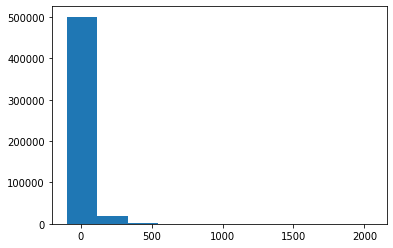

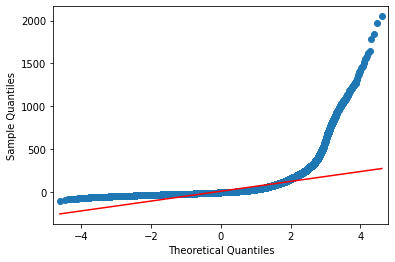

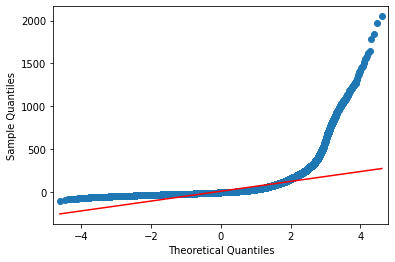

In [202]:
data1 = reduced_train_df['arr_delay'].values

# histogram plot
pyplot.hist(data1)
pyplot.show()

# q-q plot
qqplot(data1, line='s')
pyplot.show()

### Step 4. Preprocessing: Passenger Dataset
> - Taking 'origin_airport_id' variable as the point of comparison, identify the rows in passenger not in train_df
    - Use the training dataset from the preliminary preprocessing step 2 above, not from step 3.
> - Remove rows identified from passenger to make it more relevant to train_df

In [14]:
# Passengers:
# remove rows of 'origin_airport_id' from passengers, which are not in train_df

# get the list of id not in train_df
diff_lst = list(set(passengers['origin_airport_id']) - set(train_df['origin_airport_id']))
len(diff_lst)

# create new variable, 'BoolCol' in passengers with the vales, True of False
# True, if id not in train_df, so remove this row later
# False, if is in train_df, so keep this row later
BoolCol = []

for i in range(len(passengers['origin_airport_id'])):
    if passengers['origin_airport_id'][i] in diff_lst:
        BoolCol.append(True)
    else:
        BoolCol.append(False)

passengers['BoolCol'] = BoolCol
        
# check the number of rows to be deleted (i.e. number of True values)
passengers['BoolCol'].value_counts()


2138

False    1870698
True      479799
Name: BoolCol, dtype: int64

In [16]:
# get the list of row index numbers to remove from passengers
remove_rows = passengers.index[passengers['BoolCol']].tolist()

# remove the specified rows from the above step
passengers.drop(remove_rows, inplace = True )

passengers.info()
passengers.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870698 entries, 0 to 2350496
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,BoolCol
0,0.0,2.0,4000.0,16.0,0.0,0.0,0.0,223.0,126.0,91.0,...,United States,6,651,1,2015,6,1,L,DU,False
1,0.0,1.0,2000.0,8.0,1.0,0.0,0.0,236.0,100.0,45.0,...,United States,6,651,1,2015,6,1,L,DU,False
2,0.0,1.0,3000.0,13.0,0.0,0.0,0.0,386.0,80.0,63.0,...,United States,6,641,1,2015,6,1,L,DU,False


In [61]:
passengers.to_csv('reduced_passengers.csv', index=False)